<a href="https://colab.research.google.com/github/bartiralira/plataforma_cognitiva/blob/main/Plataformas_Azure_Face_Find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!git clone https://github.com/elthonf/azure-ml.git

In [ ]:
!pip install azure-cognitiveservices-vision-face
!pip install Pillow

In [38]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw,ImageFont
import json


In [6]:
def getRectangle(faceDictionary):
    """
    Função para criar um retângulo a partir de uma face identificada pelo Azure Face Detection
    :param faceDictionary:
    :return:
    """
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height

    return ((left, top), (right, bottom))

# Cliente de API

In [8]:
KEY = "037e3cac69fc4c429fd3148b1209bb72" #Coloque aqui sua chave
ENDPOINT = "https://facialexperimento.cognitiveservices.azure.com/" #Coloque aqui seu endpoint (Ponto de Extremidade)
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

Obtém arquivos

In [14]:
imagefile01 = "/content/mudadeares-20.jpg" #Imagem com a face única
NomeDoDonoDoRosto = "Elthon" #Nome da pessoa que está na face única
imagefile02 = "/content/20210509_145744.jpg" #Imagem com as faces a procurar

Identifica FaceIDs da imagem 01

In [15]:
with open(imagefile01, 'r+b') as w:
    detected_faces01 = face_client.face.detect_with_stream(image=w)

for face in detected_faces01:
    face_to_find = face.face_id
    print("**** [{0}] foi detectado com face id [{1}] em : {2}".format(NomeDoDonoDoRosto, face.face_id, face.face_rectangle))

**** [Elthon] foi detectado com face id [bfb85ad8-e845-484a-a092-de3e2103566d] em : {'additional_properties': {}, 'width': 823, 'height': 823, 'left': 1122, 'top': 1104}


Identifica FaceIDs da imagem 02

In [16]:
with open(imagefile02, 'r+b') as w:
    detected_faces02 = face_client.face.detect_with_stream(image=w)
faces_to_compare = []
for face in detected_faces02:
    faces_to_compare.append(face.face_id)
    print("**** Detected face id [{0}] on : {1}".format(face.face_id, face.face_rectangle))

#Chama API para identificar faces similares
similar_faces = face_client.face.find_similar(face_id=face_to_find, face_ids=faces_to_compare)

**** Detected face id [b79d8424-0a84-4f32-8e99-025c00c8b577] on : {'additional_properties': {}, 'width': 720, 'height': 720, 'left': 2329, 'top': 752}
**** Detected face id [5e840246-0336-43c8-82c1-8ce2ce740b53] on : {'additional_properties': {}, 'width': 589, 'height': 589, 'left': 1864, 'top': 1118}


In [44]:
fontsize = 12
font = ImageFont.truetype(font="/content/arialbd.ttf", size=30)

if not similar_faces[0]:
    print('Sem rostos similares na segunda imagem.')
else:
    for similar in similar_faces:
        print("Face [{0}] similar à face [{1}] com {2} de confiança.".format( face_to_find, similar.face_id, similar.confidence))
    img = Image.open(imagefile02)
    draw = ImageDraw.Draw(img)
    img = Image.open(imagefile02)
    draw = ImageDraw.Draw(img)
    for face in detected_faces02: #Loop de todas as faces na foto 2
        if face.face_id in list(map(lambda x: x.face_id, similar_faces)): #Se a face estiver entre as similares
            draw.rectangle(xy=getRectangle(face), outline='red',width=3)
            draw.text(xy=(face.face_rectangle.left, face.face_rectangle.top + face.face_rectangle.height),
                      text="Bartira",
                      fill="red", font=font)


Face [bfb85ad8-e845-484a-a092-de3e2103566d] similar à face [b79d8424-0a84-4f32-8e99-025c00c8b577] com 0.6477488 de confiança.


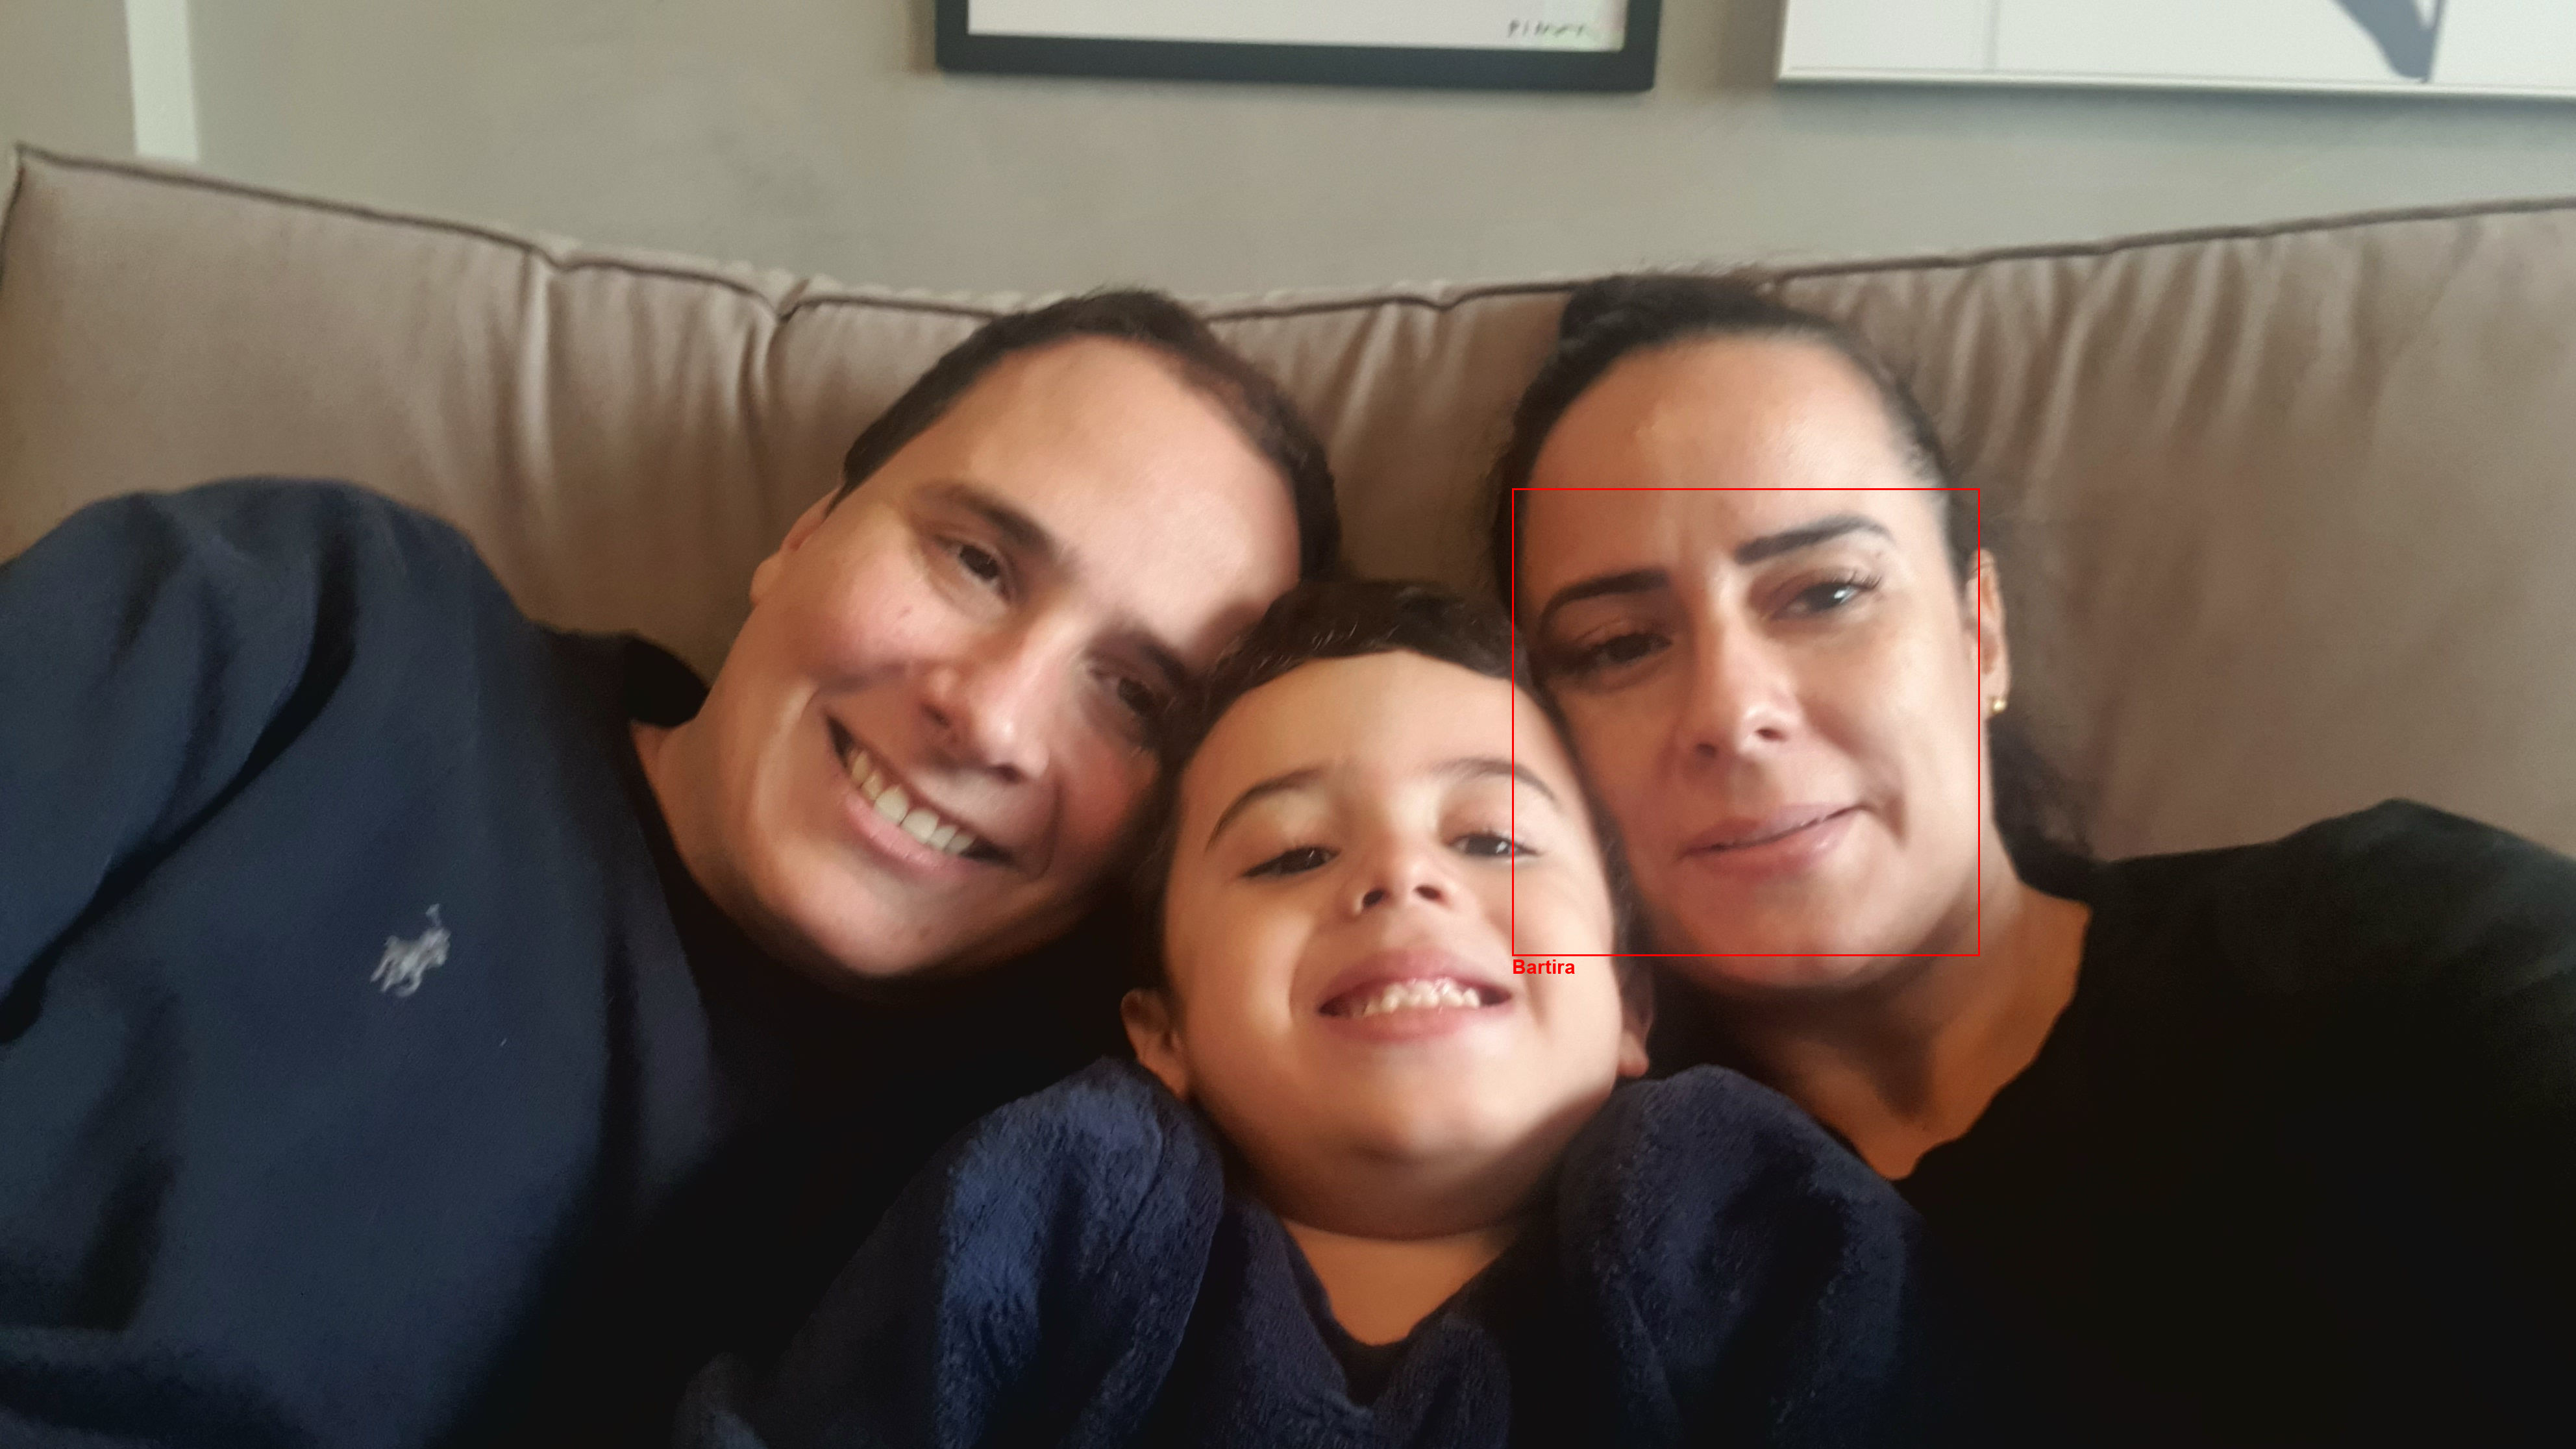

In [45]:
img